In [1]:
import ssms
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os,sys
import pandas as pd
import numpy as np


def ImPlot_plot(title,x,xlabel,y,ylabel,type = "plot",titlesize=35,xylabelsize=25,labelsize = 25,linewidth = 5):
    # corr_coef = np.corrcoef(x, y)[0, 1]
    # coefficients = np.polyfit(x, y, 1)  # 线性回归，拟合一次多项式（一次直线）
    # poly = np.poly1d(coefficients)
    # x_fit = np.linspace(min(x), max(x))  # 创建拟合线的 x 值
    # y_fit = poly(x_fit) 

    plt.figure(figsize=(12, 12))
    plt.title(title,fontdict={"fontsize" : titlesize})
    if type == "plot":
        plt.plot(x,y,linewidth=linewidth)
    elif type == "scatter":
        plt.scatter(x,y,s=linewidth)
        # plt.plot(x_fit, y_fit, color='red', label='Regression line')  # 回归线


    plt.xlabel(xlabel,fontdict={"fontsize" : xylabelsize})
    plt.tick_params(labelsize=labelsize)
    plt.ylabel(ylabel,fontdict={"fontsize" : xylabelsize})
    return plt

def MatchPrefix (criterion, ntrials,npp, nreps, par_ind = None, sd = None,es = None):
    if criterion == "GD":
        prefix_to_match = 'OutputGD{}P{}SD{}T{}N{}M{}ES'.format(par_ind,np.round(sd,2),ntrials, 
                                                                        npp, nreps,np.round(es,2))
    elif criterion == "EC": 
        prefix_to_match = 'OutputEC{}P{}SD{}TC{}T{}N{}M'.format(par_ind,sd, es, ntrials,
                                                                        npp, nreps)    
    elif criterion == "IC": 
        prefix_to_match = 'OutputIC{}T{}N{}M'.format(ntrials,npp, nreps)
    return prefix_to_match

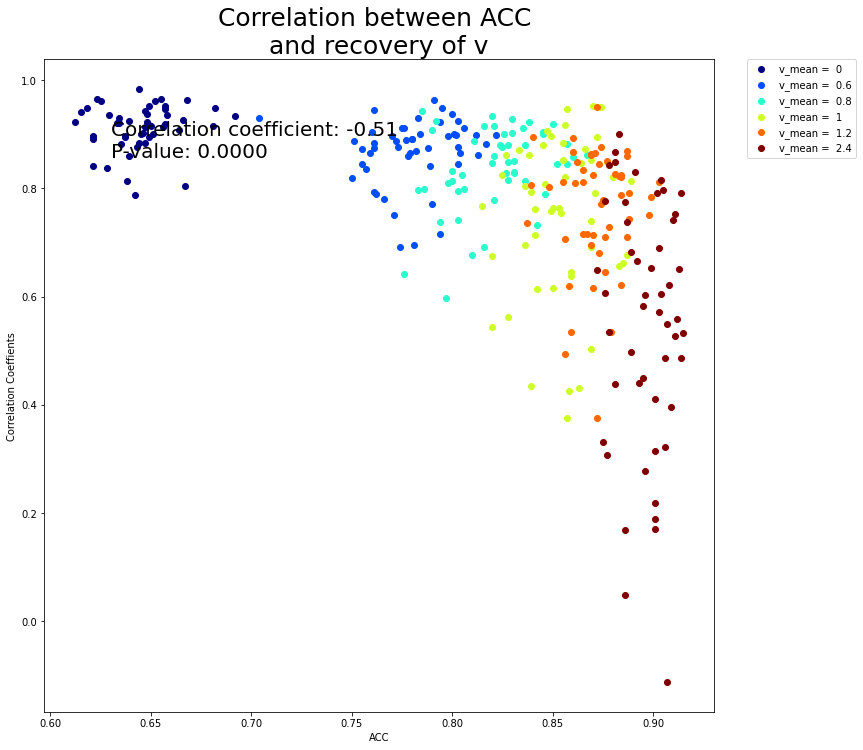

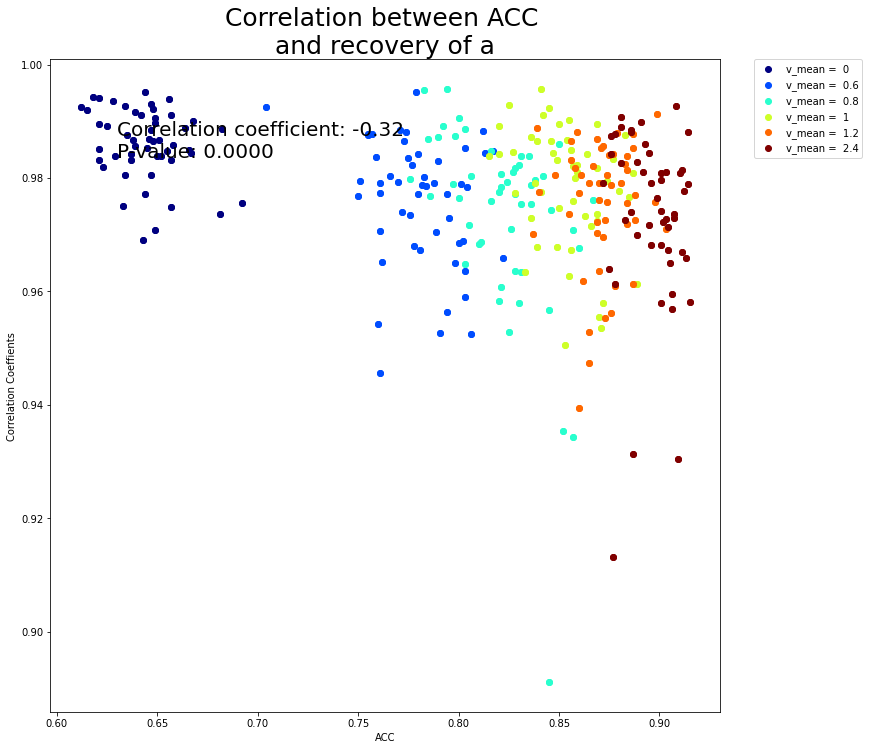

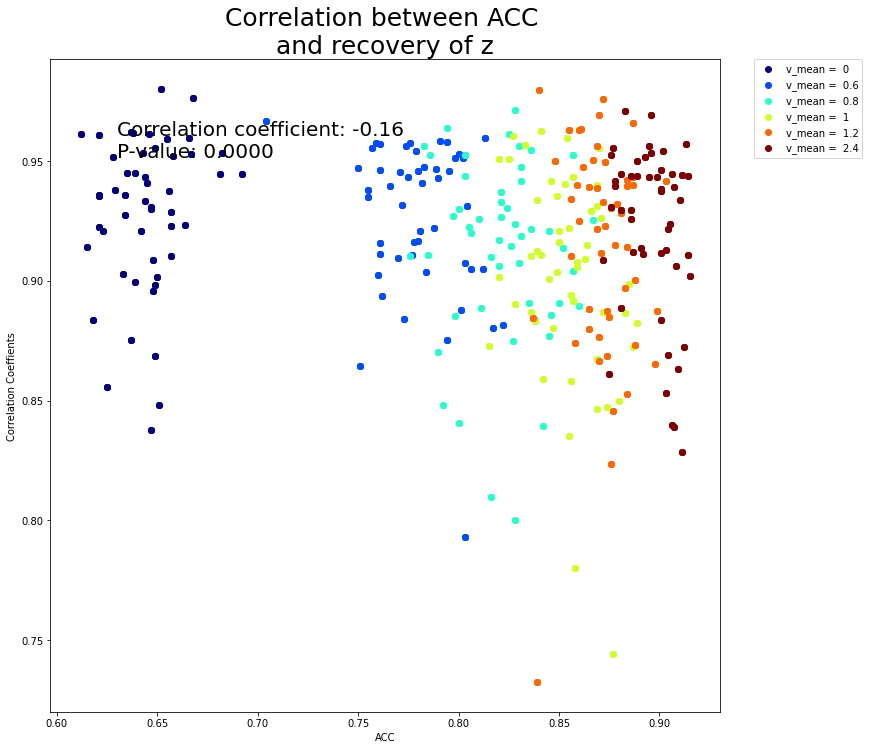

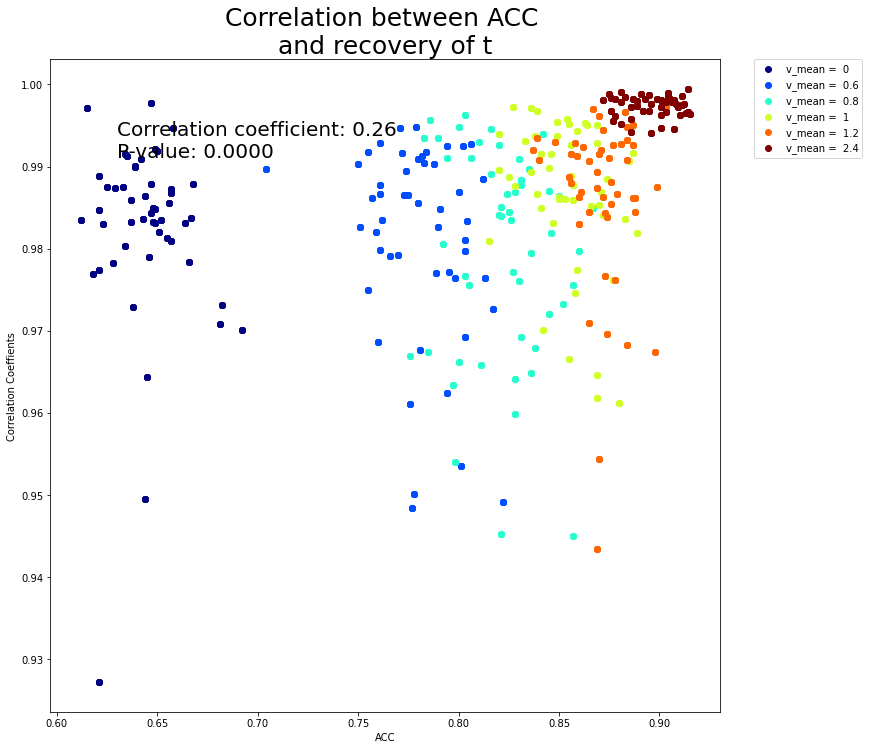

In [10]:
# plots for Proficiency & Power
# X-ACC, y-power, lable-settings of distributions

## load data
### find the results


ResultPath = "\\Private_Results\\ProCor"
DDM_id = "ddm"
ntrials = 100
npp = 20
nreps = 50
criterion = "IC"
Data_folder = os.getcwd()+ResultPath
results_files = [f for f in os.listdir(Data_folder) if os.path.isfile(os.path.join(Data_folder, f)) and f.lower().endswith('.csv')]
save = 0
p_list = ['v','a','z','t']
v_mean = ['0',"0.6",'0.8','1','1.2',"2.4"] 
Alldata_list = []
## plot

title_pre = "Correlation between ACC \nand recovery of "
titlesize = 25
linewidth =8
##
for n_p in range(len(p_list)):
    for file in results_files:
        if file.startswith(MatchPrefix (criterion, ntrials,npp, nreps, par_ind = None, sd = None,es = None)) :  # check prefix

            OutputFile_path = Data_folder+ '\\' + file
            OutputResults = pd.read_csv(OutputFile_path, delimiter = ',')
            Alldata_list.append(OutputResults) 

    Alldata = pd.concat(Alldata_list,ignore_index=True)
    plt.figure(figsize=(12, 12))
    title = title_pre + p_list[n_p]
    plt.title(title,fontdict={"fontsize" : titlesize})

    unique_input_rows = np.sort(Alldata['Input_row'].unique())
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_input_rows)))

    for input_row, color in zip(unique_input_rows, colors):

        subset = Alldata[Alldata['Input_row'] == input_row]

        plt.scatter(subset['ACC_average'], subset[ p_list[n_p]], color=color, label=f'v_mean =  {v_mean[input_row]}')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("ACC")
    plt.ylabel("Correlation Coeffients")
    # sns.regplot(x=Alldata[p_list[n_p]], y=Alldata["ACC_average"])
    corr_coef, p_value = stats.pearsonr(Alldata["ACC_average"],Alldata[p_list[n_p]])
    annotation = f"Correlation coefficient: {corr_coef:.2f}\nP-value: {p_value:.4f}"
    plt.annotate(annotation, xy=(0.1, 0.85), xycoords='axes fraction', fontsize=20)


    if save:
        file_name = '\ProPowIC{}T{}N{}M_{}.png'.format(ntrials,npp,nreps,p_list[n_p])
        plt.savefig(ResultPath+file_name,bbox_inches='tight')